In [ ]:
import sympy
import numpy as np
import math
import matplotlib.pyplot as plt

# if using a jupyter notebook
%matplotlib inline

# Cinemática Direta

In [ ]:
def matriz_DH(theta, d, a, alpha):
    """
    Gera a matriz de Denavit-Hartenberg para uma junta específica.

    Args:
        theta (sympy.Symbol): Símbolo theta representando o ângulo.
        d (float): Valor da variável d.
        a (float): Valor da variável a.
        alpha (float): Valor do ângulo alpha em radianos.

    Returns:
        np.ndarray: Matriz de Denavit-Hartenberg gerada.
    """

    # Converte alpha de graus para radianos
    alpha = sympy.rad(alpha)

    cos_theta = sympy.cos(theta)
    sin_theta = sympy.sin(theta)
    cos_alpha = sympy.cos(alpha)
    sin_alpha = sympy.sin(alpha)

    matriz = np.array([[cos_theta, -sin_theta*cos_alpha, sin_theta*sin_alpha, a*cos_theta],
                       [sin_theta, cos_theta*cos_alpha, -cos_theta*sin_alpha, a*sin_theta],
                       [0, sin_alpha, cos_alpha, d],
                       [0, 0, 0, 1]])

    return matriz

def matriz_DH_total(parametros):
    """
    Gera a matriz de Denavit-Hartenberg para um conjunto de juntas.

    Args:
        parametros (list): Lista de dicionários contendo os parâmetros de cada junta.

    Returns:
        np.ndarray: Matriz de Denavit-Hartenberg total gerada.
    """
    matriz_total = np.eye(4)

    for param in parametros:
        d = param['d']
        a = param['a']
        alpha = param['alpha']
        theta = param['theta']

        matriz = matriz_DH(theta, d, a, alpha)
        matriz_total = np.dot(matriz_total, matriz)

    return matriz_total

# Função que cria a matriz de Denavit-Hartenberg parcial da junta j até a junta K
def matriz_DH_parcial(parametros, j, k):
    """
    Gera a matriz de Denavit-Hartenberg para um conjunto de juntas.

    Args:
        parametros (list): Lista de dicionários contendo os parâmetros de cada junta.
        j (int): Número da junta inicial.
        k (int): Número da junta final.

    Returns:
        np.ndarray: Matriz de Denavit-Hartenberg parcial gerada.
    """
    matriz_total = np.eye(4)

    for i in range(j, k+1):
        param = parametros[i]
        d = param['d']
        a = param['a']
        alpha = param['alpha']
        theta = param['theta']

        matriz = matriz_DH(theta, d, a, alpha)
        matriz_total = np.dot(matriz_total, matriz)

    return matriz_total

# Definição dos parâmetros de DH

In [ ]:
thetas = [sympy.Symbol('theta_1'), sympy.Symbol('theta_2'), sympy.Symbol('theta_3'), sympy.Symbol('theta_4'), sympy.Symbol('theta_5'), sympy.Symbol('theta_6')]
ds = [495, 0, 0, 1270, 0, 135]
as_ = [175, 1095, 175, 0, 0, 0]
alphas = [-90, 0, -90, 90, 90, 0]

parametros_juntas = [
    {'theta': thetas[0], 'd': ds[0], 'a': as_[0], 'alpha': alphas[0]},
    {'theta': thetas[1], 'd': ds[1], 'a': as_[1], 'alpha': alphas[1]},
    {'theta': thetas[2], 'd': ds[2], 'a': as_[2], 'alpha': alphas[2]},
    {'theta': thetas[3], 'd': ds[3], 'a': as_[3], 'alpha': alphas[3]},
    {'theta': thetas[4], 'd': ds[4], 'a': as_[4], 'alpha': alphas[4]},
    {'theta': thetas[5], 'd': ds[5], 'a': as_[5], 'alpha': alphas[5]}
]

## Calculo das matrizes parciais

In [ ]:
# 0 -> 1
sympy.nsimplify(matriz_DH_parcial(parametros_juntas, 0, 0), tolerance=1e-1, rational=True)

[[cos(theta_1), 0, -sin(theta_1), 175*cos(theta_1)], [sin(theta_1), 0, cos(theta_1), 175*sin(theta_1)], [0, -1, 0, 495], [0, 0, 0, 1]]

In [ ]:
# 1 -> 2
sympy.nsimplify(matriz_DH_parcial(parametros_juntas, 1, 1), tolerance=1e-1, rational=True)

[[cos(theta_2), -sin(theta_2), 0, 1095*cos(theta_2)], [sin(theta_2), cos(theta_2), 0, 1095*sin(theta_2)], [0, 0, 1, 0], [0, 0, 0, 1]]

In [ ]:
# 2 -> 3
sympy.nsimplify(matriz_DH_parcial(parametros_juntas, 2, 2), tolerance=1e-1, rational=True)

[[cos(theta_3), 0, -sin(theta_3), 175*cos(theta_3)], [sin(theta_3), 0, cos(theta_3), 175*sin(theta_3)], [0, -1, 0, 0], [0, 0, 0, 1]]

In [ ]:
# 3 -> 4
sympy.nsimplify(matriz_DH_parcial(parametros_juntas, 3, 3), tolerance=1e-1, rational=True)

[[cos(theta_4), 0, sin(theta_4), 0], [sin(theta_4), 0, -cos(theta_4), 0], [0, 1, 0, 1270], [0, 0, 0, 1]]

In [ ]:
# 4 -> 5
sympy.nsimplify(matriz_DH_parcial(parametros_juntas, 4, 4), tolerance=1e-1, rational=True)

[[cos(theta_5), 0, sin(theta_5), 0], [sin(theta_5), 0, -cos(theta_5), 0], [0, 1, 0, 0], [0, 0, 0, 1]]

In [ ]:
# 5 -> 6
sympy.nsimplify(matriz_DH_parcial(parametros_juntas, 5, 5), tolerance=1e-1, rational=True)

[[cos(theta_6), -sin(theta_6), 0, 0], [sin(theta_6), cos(theta_6), 0, 0], [0, 0, 1, 135], [0, 0, 0, 1]]

## Calculo da MTH final


In [ ]:
# 0 -> 6

matriz_total_DH = matriz_DH_total(parametros_juntas)

print("Matriz de Denavit-Hartenberg:")
sympy.Matrix(matriz_total_DH)

Matriz de Denavit-Hartenberg:


Matrix([
[(((-1.0*sin(theta_2)*sin(theta_3)*cos(theta_1) + 1.0*cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) + 1.0*sin(theta_1)*sin(theta_4))*cos(theta_5) + (-1.0*sin(theta_2)*cos(theta_1)*cos(theta_3) - 1.0*sin(theta_3)*cos(theta_1)*cos(theta_2))*sin(theta_5))*cos(theta_6) + ((-1.0*sin(theta_2)*sin(theta_3)*cos(theta_1) + 1.0*cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(theta_4) - 1.0*sin(theta_1)*cos(theta_4))*sin(theta_6), -(((-1.0*sin(theta_2)*sin(theta_3)*cos(theta_1) + 1.0*cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) + 1.0*sin(theta_1)*sin(theta_4))*cos(theta_5) + (-1.0*sin(theta_2)*cos(theta_1)*cos(theta_3) - 1.0*sin(theta_3)*cos(theta_1)*cos(theta_2))*sin(theta_5))*sin(theta_6) + ((-1.0*sin(theta_2)*sin(theta_3)*cos(theta_1) + 1.0*cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(theta_4) - 1.0*sin(theta_1)*cos(theta_4))*cos(theta_6), ((-1.0*sin(theta_2)*sin(theta_3)*cos(theta_1) + 1.0*cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) + 1.0*sin(theta_1)*sin(theta_4))

## Vetor posição do efetuador final

In [ ]:
# Aplica valores de theta na matriz final
# Usando loop for
new_theta = [sympy.rad(0), sympy.rad(-3.651 - 90), sympy.rad( 3.565), sympy.rad(0), sympy.rad(0-180), sympy.rad(0)]

matriz_final = matriz_total_DH
for i in range(0,4):
    for j in range(0,4):
        matriz_final[i][j] = matriz_final[i][j].subs({thetas[0]: new_theta[0], thetas[1]: new_theta[1], thetas[2]: new_theta[2], thetas[3]: new_theta[3], thetas[4]: new_theta[4], thetas[5]: new_theta[5]})

matriz_final = sympy.nsimplify(matriz_final, tolerance=1e-1, rational=True)
print('Posição final do efetuador:')
print('X: ', math.trunc(matriz_final[0][3]))
print('Y: ', math.trunc(matriz_final[1][3]))
print('Z: ', math.trunc(matriz_final[2][3]))

Posição final do efetuador:
X:  1580
Y:  0
Z:  1765


# Cinemática Inversa

In [ ]:
# Definition of DH parameters
d1 = 0.495
d2 = 0.0
d3 = 0.0
d4 = 1.475
d5 = 0.0
d6 = 0.135

a1 = 0.175
a2 = 1.095
a3 = 0.175
a4 = 0.0
a5 = 0.0
a6 = 0.0

alpha1 = -1 * math.pi / 2
alpha2 = 0.0
alpha3 = -1 * math.pi / 2
alpha4 = math.pi / 2
alpha5 = math.pi / 2
alpha6 = 0.0

## 0 - Definição de parâmetros

In [ ]:
# Final actuator parameters
# X = red
x_final = 1.58
# Y = green
y_final = 0
# Z = blue
z_final = 1.765

# Final orientation parameters
t4 = np.deg2rad(0)
t5 = np.deg2rad(0)

# Wrist position parameters
yc = y_final
xc = x_final

## 1 - Cinemática inversa de posição do corpo

In [ ]:
# Calculation of theta 1
def theta1(xc,yc):
    return math.atan2(yc, xc)

print(math.degrees(theta1(xc,yc)))

0.0


In [ ]:
# Calculation of theta 3
def theta3(x_final, y_final, z_final, xc, yc):
    s = z_final - d1
    beta = math.sqrt(math.pow(a3,2) + math.pow(d4,2))
    r = math.sqrt(math.pow((x_final - a1)*math.cos(theta1(xc,yc)),2) + math.pow((y_final - a1)*math.sin(theta1(xc,yc)),2))

    D = ( math.pow(r,2) + math.pow(s,2) - math.pow(a2,2) - math.pow(beta,2) )/(2*a2*beta)

    return math.atan2(math.sqrt(1 - math.pow(D,2)), D) - (math.pi / 2) + math.atan2(a3, d4)

print(math.degrees(theta3(x_final, y_final, z_final, xc, yc)))

3.564976857227738


In [ ]:
# Calculation of theta 2
def theta2 (x_final, y_final, z_final, xc, yc):
    s = z_final - d1
    beta = math.sqrt(math.pow(a3,2) + math.pow(d4,2))
    r = math.sqrt(math.pow((x_final - a1)*math.cos(theta1(xc,yc)),2) + math.pow((y_final - a1)*math.sin(theta1(xc,yc)),2))

    return (-1 * math.atan2(s,r)) + math.atan2(beta*math.sin(-theta3(x_final, y_final, z_final, xc, yc) - (math.pi / 2) + math.atan2(a3,d4)), a2 + beta*math.cos(-theta3(x_final, y_final, z_final, xc, yc) - (math.pi / 2) + math.atan2(a3,d4))) + (math.pi/2)

print(math.degrees(theta2(x_final, y_final, z_final, xc, yc)))

-3.6513269742072993


## 2 = Cinemática inversa de posição do punho

In [ ]:
# Definition of the DH matrix
def DH_matrix(theta, d, a, alpha):
    return np.array([[math.cos(theta), -1*math.sin(theta)*math.cos(alpha), math.sin(theta)*math.sin(alpha), a*math.cos(theta)],
                        [math.sin(theta), math.cos(theta)*math.cos(alpha), -1*math.cos(theta)*math.sin(alpha), a*math.sin(theta)],
                        [0, math.sin(alpha), math.cos(alpha), d],
                        [0, 0, 0, 1]])

In [ ]:
# DH matrix for the first three joints
def DH03(t1,t2,t3,t4,t5):
    DH1 = DH_matrix(t1, d1, a1, alpha1)
    DH2 = DH_matrix(t2, d2, a2, alpha2)
    DH3 = DH_matrix(t3, d3, a3, alpha3)

    DH03 = np.dot(np.dot(DH1, DH2), DH3)

    orientacao = np.array([
        [1,0,1,0],
        [0,1,math.tan(t4),0],
        [0,0,math.tan(t5)*math.sqrt(1+math.tan(t4)**2),0],
        [0,0,0,1]
    ])

    DH03 = np.dot(orientacao, DH03)

    # Round the values of the matrix
    DH03 = np.around(DH03, decimals=3)
    return DH03


In [ ]:
# Calculation of theta 5
def theta5(DH03):
    return -(math.atan2(math.sqrt( math.pow(DH03[0,2],2) + math.pow(DH03[1,2],2) ), DH03[2,2]))+ math.pi/2

print(math.degrees(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))))

0.0


In [ ]:
# Calculation of theta 4
def theta4(DH03):
    return math.atan2(DH03[1,2],DH03[0,2]) - math.pi

print(math.degrees(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))))

0.0


In [ ]:
def theta6(DH03=0):
    return 0

print(math.degrees(theta6()))

0.0


In [ ]:
print('\u03B8_1 = ', np.around(math.degrees(theta1(xc,yc)), decimals=3))
print('\u03B8_2 = ', np.around(math.degrees(theta2(x_final, y_final, z_final, xc, yc)), decimals=3))
print('\u03B8_3 = ', np.around(math.degrees(theta3(x_final, y_final, z_final, xc, yc)), decimals=3))
print('\u03B8_4 = ', np.around(math.degrees(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))), decimals=3))
print('\u03B8_5 = ', np.around(math.degrees(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))), decimals=3))
print('\u03B8_6 = ', np.around(math.degrees(theta6()), decimals=3))

θ_1 =  0.0
θ_2 =  -3.651
θ_3 =  3.565
θ_4 =  0.0
θ_5 =  0.0
θ_6 =  0.0


## 3 - Definição dos pontos de trajetória

X
[1.4   ,1.4207,1.5292,1.6834,1.7496,1.6631,1.5079,1.4132,1.3999,1.3697,
 1.2483,1.0984,1.054 ,1.1587,1.312 ,1.3924]
Y
[-1.143 ,-1.0652,-0.9495,-0.9671,-1.1112,-1.2722,-1.4103,-1.5236,-1.5618,
 -1.4954,-1.3718,-1.2276,-1.0629,-0.9447,-0.9748,-1.101 ]
Length of X:  16


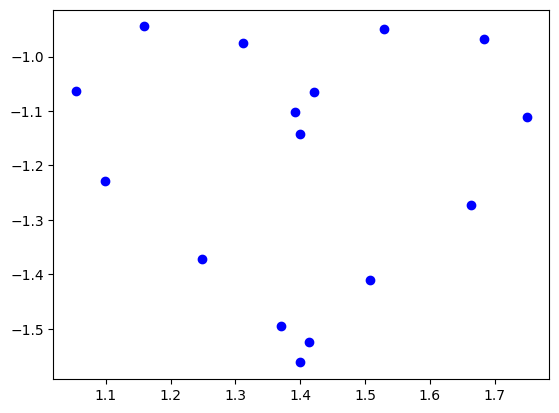

In [ ]:
t = np.arange(0, 2*np.pi, 0.4)

x = 0.35 * np.sin(t)**3 + 1.4
y = 0.262 * np.cos(t) - 0.127 * np.cos(2*t) - 0.052 * np.cos(3*t) - 0.026 * np.cos(4*t) - 1.2

# Generates constant values for the z axis
z = np.full((len(x)), 0.01)

print('X')
print(np.array2string(x, precision=4, separator=',', suppress_small=True))
print('Y')
print(np.array2string(y, precision=4, separator=',', suppress_small=True))

print('Length of X: ', len(x))

plt.plot(x, y, 'bo')
plt.show()

In [ ]:
motor0 = []
motor1 = []
motor2 = []
motor3 = []
motor4 = []
motor5 = []


for i in range(0, len(x)):
    motor0.append(theta1(x[i],y[i]))
    motor1.append(theta2(x[i], y[i], z[i], x[i], y[i]))
    motor2.append(theta3(x[i], y[i], z[i], x[i], y[i]))

    this_Dh03 = DH03(motor0[i], motor1[i], motor2[i], t4, t5)

    motor3.append(theta4(this_Dh03))
    motor4.append(theta5(this_Dh03))
    motor5.append(theta6())

print('motor0 = ', np.array2string(np.around(motor0, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor1 = ', np.array2string(np.around(motor1, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor2 = ', np.array2string(np.around(motor2, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor3 = ', np.array2string(np.around(motor3, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor4 = ', np.array2string(np.around(motor4, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor5 = ', np.array2string(np.around(motor5, decimals=3), precision=4, separator=',', suppress_small=True))

motor0 =  [-0.685,-0.643,-0.556,-0.521,-0.566,-0.653,-0.752,-0.823,-0.84 ,-0.829,
 -0.832,-0.841,-0.79 ,-0.684,-0.639,-0.669]
motor1 =  [0.648,0.64 ,0.662,0.72 ,0.754,0.742,0.734,0.757,0.77 ,0.742,0.687,0.627,
 0.573,0.56 ,0.599,0.639]
motor2 =  [0.623,0.641,0.595,0.475,0.407,0.431,0.447,0.402,0.376,0.431,0.543,0.667,
 0.786,0.815,0.729,0.644]
motor3 =  [-0.528,-0.5  ,-0.422,-0.376,-0.397,-0.464,-0.539,-0.581,-0.586,-0.593,
 -0.624,-0.665,-0.657,-0.576,-0.516,-0.521]
motor4 =  [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
motor5 =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


## 4 - Planejamento de trajetória

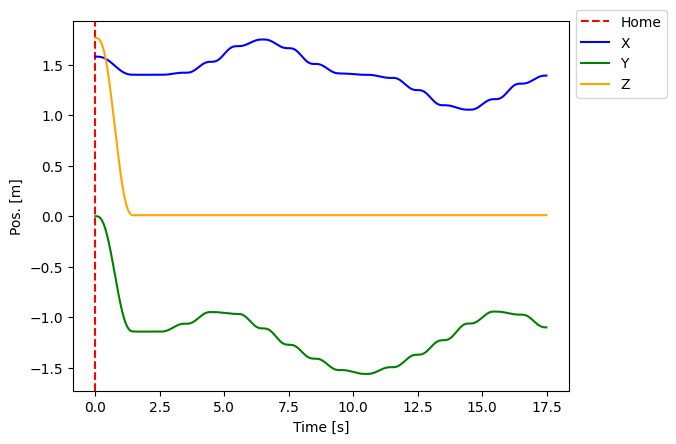

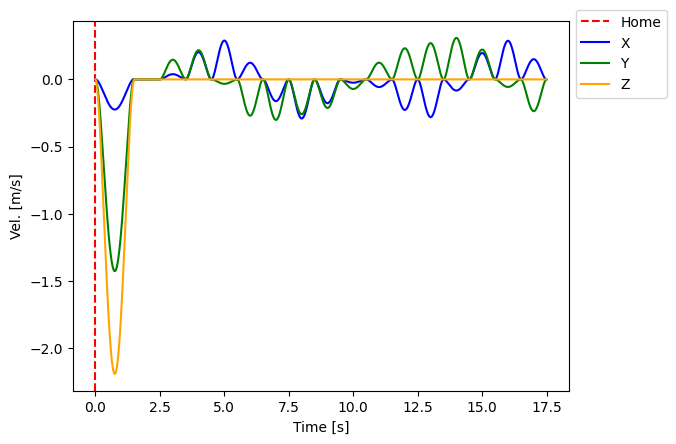

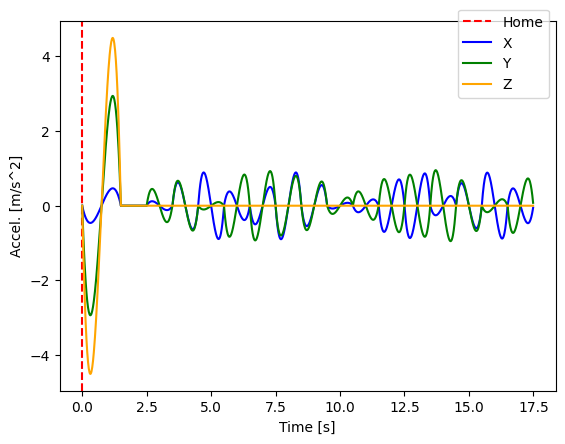

In [ ]:
# Task time
tf_ = 1.5 # segundo

# Columns = Initial position, speed and acceleration
# Rows = x, y and z
home_q = [
    [1.580,0,0],
    [0,0,0],
    [1.765,0,0]
]

# Columns = Final position, speed and acceleration
# Rows = x, y and z
table_q = [
    [1.400,0,0],
    [-1.143,0,0],
    [0.01,0,0]
]

qi = None
qf = None

heart_times = [1 for i in range(16)]
task_times = [tf_] + heart_times

prev_tf = 0.0

final_x = []
final_y_pos = {}
final_y_vel = {}
final_y_acc = {}

name_color = {
  "X": "blue",
  "Y": "green",
  "Z": "orange",
}

for index, tf in enumerate(task_times):
  if qi is None or qf is None:
    qi = home_q
    qf = table_q
  else:
    qi = [
        [qf[0][0],0,0],
        [qf[1][0],0,0],
        [qf[2][0],0,0]
    ]

    qf = [
      [x[index-1],0,0],
      [y[index-1],0,0],
      [table_q[2][0],0,0]
    ]

  # Find initial position indexes

  a_0 = [qi[0][0],qi[1][0],qi[2][0]]
  a_1 = [qi[0][1],qi[1][1],qi[2][1]]
  a_2 = [qi[0][2]/2,qi[1][2]/2,qi[2][2]/2]

  # Define linear system for final position indexes
  LS = [
      [ math.pow(tf,5) , math.pow(tf,4), math.pow(tf,3)],
      [ 5*math.pow(tf,4) , 4*math.pow(tf,3), 3*math.pow(tf,2) ],
      [ 20*math.pow(tf,3) , 12*math.pow(tf,2), 6*tf ]
  ]

  SS = []
  for i in range(0,3):
    SS += [[
      [qf[i][0] - (a_0[i] + a_1[i]*tf + a_2[i]*math.pow(tf,2))],
      [qf[i][1] - (a_1[i] + 2*a_2[i]*tf)],
      [qf[i][2] - (2*a_2[i])]
    ]]

  solutions = {}

  solutions["X"] = np.linalg.solve(LS,SS[0])

  solutions["Y"] = np.linalg.solve(LS,SS[1])

  solutions["Z"] = np.linalg.solve(LS,SS[2])

  a_5 = np.around([solutions["X"][0][0], solutions["Y"][0][0], solutions["Z"][0][0]], decimals=3)
  a_4 = np.around([solutions["X"][1][0], solutions["Y"][1][0], solutions["Z"][1][0]], decimals=3)
  a_3 = np.around([solutions["X"][2][0], solutions["Y"][2][0], solutions["Z"][2][0]], decimals=3)

  timeseries_x = np.arange(start=0, stop=tf, step=tf/100)
  final_x += list(timeseries_x + prev_tf)

  for i, name in enumerate(solutions.keys()):
    if name not in final_y_pos.keys():
      final_y_pos[name] = []
    if name not in final_y_vel.keys():
      final_y_vel[name] = []
    if name not in final_y_acc.keys():
      final_y_acc[name] = []
    final_y_pos[name] += [a_5[i]*(j**5)+a_4[i]*(j**4)+a_3[i]*(j**3)+a_2[i]*(j**2)+a_1[i]*(j**1)+a_0[i] for j in timeseries_x]
    final_y_vel[name] += [5*a_5[i]*(j**4)+4*a_4[i]*(j**3)+3*a_3[i]*(j**2)+2*a_2[i]*(j**1)+a_1[i] for j in timeseries_x]
    final_y_acc[name] += [20*a_5[i]*(j**3)+12*a_4[i]*(j**2)+6*a_3[i]*(j**1)+2*a_2[i] for j in timeseries_x]

  prev_tf += tf


plt.figure(1)
plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
plt.xlabel(xlabel="Time [s]")
plt.ylabel(ylabel="Pos. [m]")
for i, name in enumerate(solutions.keys()):
  plt.plot(final_x, final_y_pos[name], label=name, color=name_color[name])
plt.legend(bbox_to_anchor=(1, 1.05))

plt.figure(2)
plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
plt.xlabel(xlabel="Time [s]")
plt.ylabel(ylabel="Vel. [m/s]")
for i, name in enumerate(solutions.keys()):
  plt.plot(final_x, final_y_vel[name], label=name, color=name_color[name])
plt.legend(bbox_to_anchor=(1, 1.05))

plt.figure(3)
plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
plt.xlabel(xlabel="Time [s]")
plt.ylabel(ylabel="Accel. [m/s^2]")
for i, name in enumerate(solutions.keys()):
  plt.plot(final_x, final_y_acc[name], label=name, color=name_color[name])
plt.legend(bbox_to_anchor=(1, 1.05))

plt.show()

## 5 - Posição angular de junta

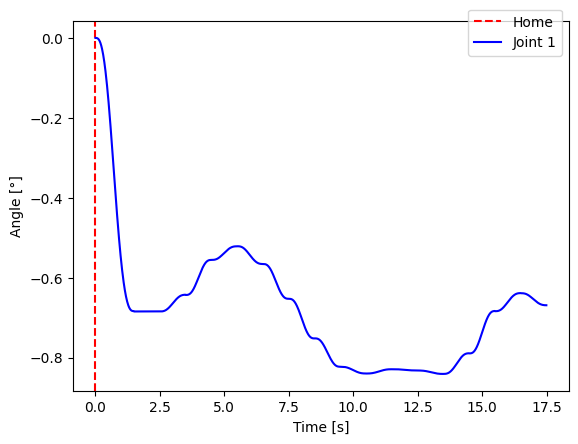

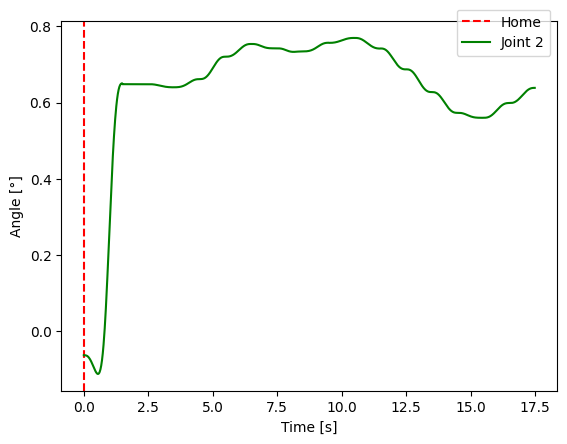

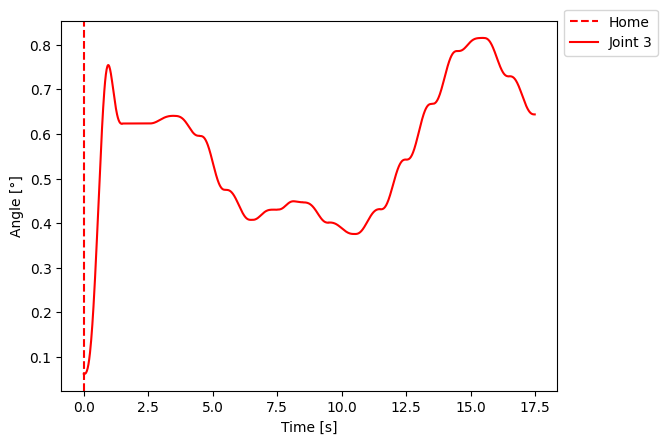

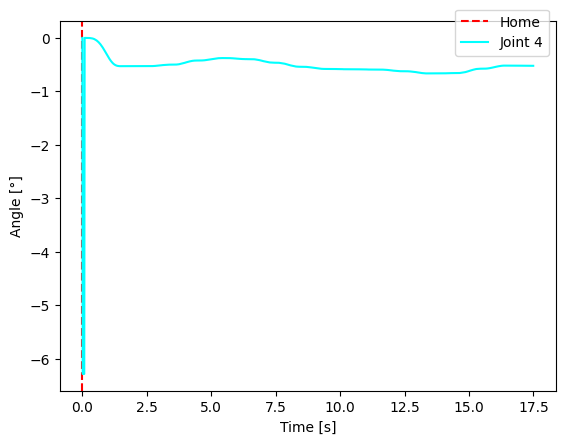

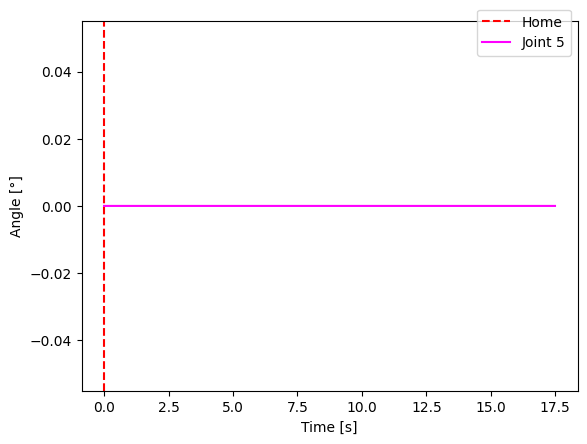

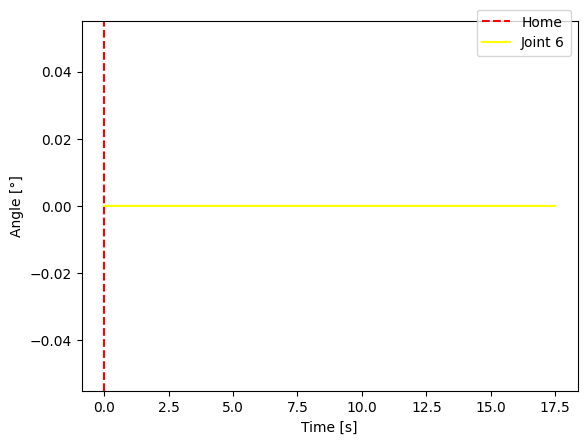

In [ ]:
x = final_y_pos['X']
y = final_y_pos['Y']
z = final_y_pos['Z']

motor = [0,0,0,0,0,0]

motor[0] = []
motor[1] = []
motor[2] = []
motor[3] = []
motor[4] = []
motor[5] = []


for i in range(0, len(x)):
    motor[0].append(round(theta1(x[i],y[i]), 5))
    motor[1].append(round(theta2(x[i], y[i], z[i], x[i], y[i]), 5))
    motor[2].append(round(theta3(x[i], y[i], z[i], x[i], y[i]), 5))

    this_Dh03 = DH03(motor[0][i], motor[1][i], motor[2][i], t4, t5)

    motor[3].append(round(theta4(this_Dh03), 5))
    motor[4].append(round(theta5(this_Dh03), 5))
    motor[5].append(round(theta6(), 5))

motor_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for i in range(0,6):
    plt.figure(i+4)
    plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
    plt.xlabel(xlabel="Time [s]")
    plt.ylabel(ylabel="Angle [°]")
    # for i, name in enumerate(solutions.keys()):
    #   plt.plot(final_x, final_y_pos[name], label=name, color=name_color[name])
    plt.plot(final_x, motor[i], label="Joint "+str(i+1), color=motor_colors[i])
    plt.legend(bbox_to_anchor=(1, 1.05))

    # Save image
    plt.savefig("joint_"+str(i)+"_angle.png", dpi=300, bbox_inches='tight')

## 6 - Velocidade angular de junta

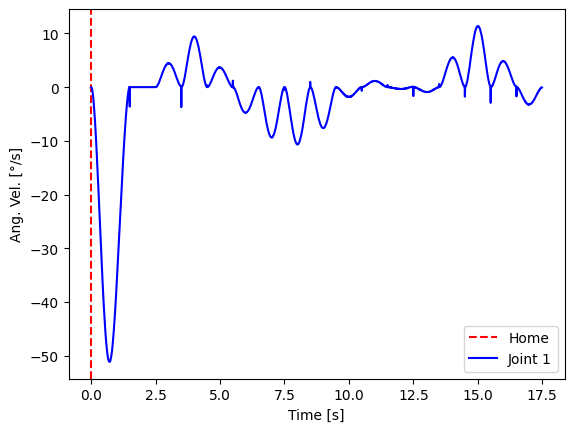

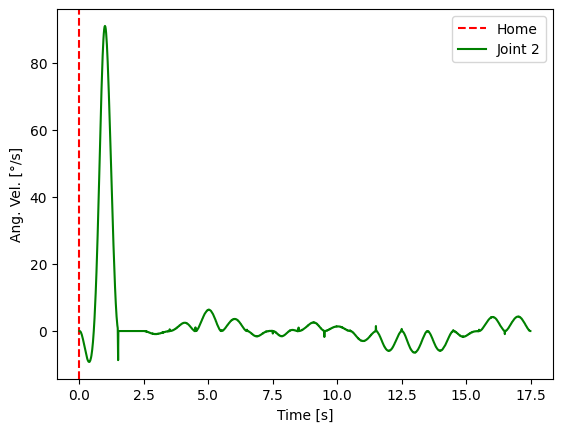

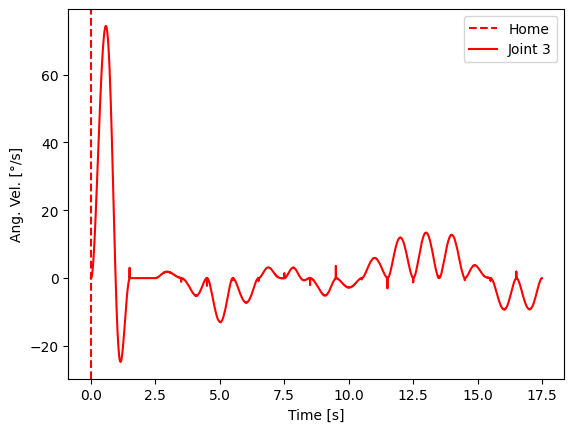

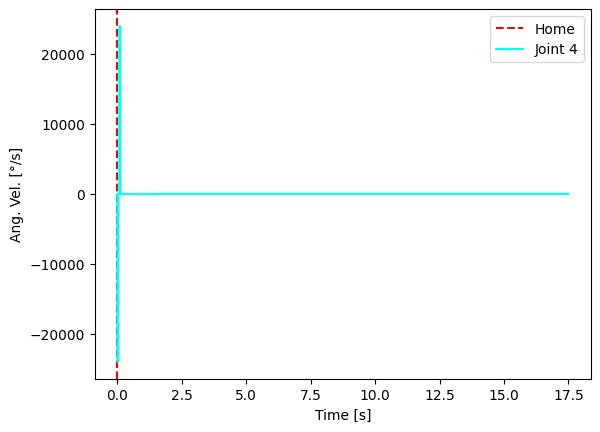

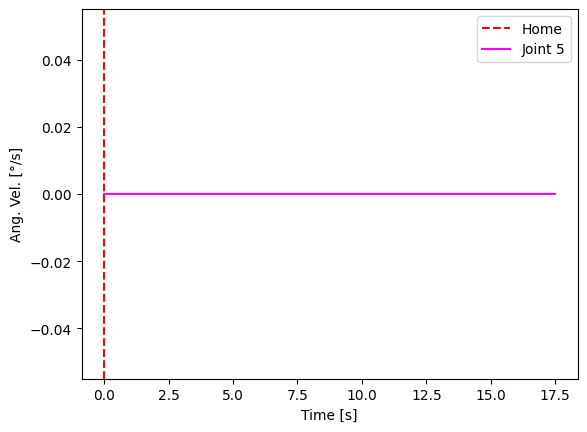

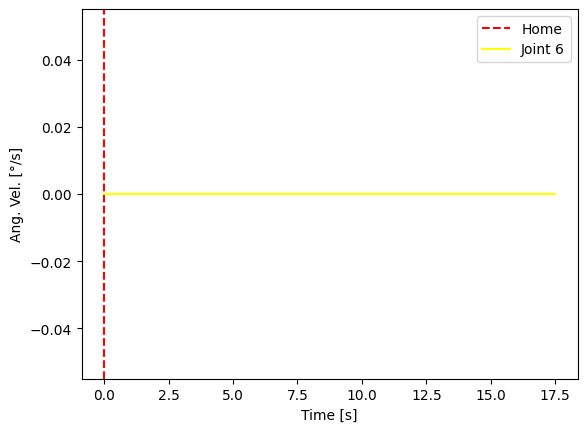

In [ ]:
angular_velocities = [
  np.diff([np.rad2deg(i) for i in motor[0]]) / np.diff(final_x),
  np.diff([np.rad2deg(i) for i in motor[1]]) / np.diff(final_x),
  np.diff([np.rad2deg(i) for i in motor[2]]) / np.diff(final_x),
  np.diff([np.rad2deg(i) for i in motor[3]]) / np.diff(final_x),
  np.diff([np.rad2deg(i) for i in motor[4]]) / np.diff(final_x),
  np.diff([np.rad2deg(i) for i in motor[5]]) / np.diff(final_x),
]

motor_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for i in range(len(motor_colors)):
  plt.axvline(x=0, label="Home", color='red', linestyle='dashed')
  plt.xlabel(xlabel="Time [s]")
  plt.ylabel(ylabel="Ang. Vel. [°/s]")
  plt.plot(final_x, [0] + list(angular_velocities[i]), color=motor_colors[i], label=f"Joint {i+1}")
  plt.legend()
  plt.show()